In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif']=['Simhei']  #显示中文
plt.rcParams['axes.unicode_minus']=False    #显示负号  

from scipy.optimize import curve_fit
# rng = np.random.default_rng()
import os
# path='pic' #创建图片文件
# os.makedirs(path,exist_ok=True)

In [89]:
def string_result(x,dx,latex=False):
    #返回类型位字符串，latex变量选择是否返回LaTeX源码
    order_x=np.floor(np.log10(abs(x)))
    order_dx=np.floor(np.log10(abs(dx)))
    value_x=x/10**order_x
    value_dx=dx/10**order_dx
    delord=order_x-order_dx
    # print(delord)
    if delord>=0:
        two_number=0
        # print(value_dx)
        if (value_dx<2):
            two_number=1
        
        value_dx=value_dx*10**(-delord)
        # order_x=log(x)/log(10)
        delord+=two_number
        value_x_show=f"{value_x:.{int(delord)}f}"
        value_dx_show=f"{value_dx:.{int(delord)}f}"
    else :
        delord = abs(delord)
        value_x = value_x*10**(-delord)
        value_x_show=f"{value_x:.{int(delord)}f}"
        value_dx_show=f"{value_dx:.{int(delord)}f}"

    if latex:
        return(f'$( {value_x_show}\\pm{value_dx_show} )\\times 10^{order_x}$')
    else:
        return(f'({value_x_show} ± {value_dx_show} )×10^{order_x}')

In [90]:
df_dis = pd.read_excel('Data2.xlsx',sheet_name='distance')
df_dis

,距离参数(cm),t_t(s),N_t,n_t,sigma_t,t_b,N_b,n_b,sigma_b,n,sigma_n
0,25,60,55489,924.816667,3.926017,20,2639,131.950000,2.568560,792.866667,4.691600
1,23,61,30579,501.295082,2.866697,28,3652,130.428571,2.158278,370.866511,3.588330
2,21,64,22540,352.187500,2.345832,36,4869,135.250000,1.938284,216.937500,3.043004
3,19,49,13360,272.653061,2.358887,31,4039,130.290323,2.050101,142.362739,3.125262
4,17,57,13391,234.929825,2.030166,40,5290,132.250000,1.818310,102.679825,2.725404
5,15,55,11363,206.600000,1.938134,42,5547,132.071429,1.773290,74.528571,2.626960


0 15343.915198511195 201.23250283824694
第0个参数的结果为:$( 1.53\pm0.02 )\times 10^4.0$
1 20.596820250113222 0.033738358641599554
第1个参数的结果为:$( 2.060\pm0.003 )\times 10^1.0$
决定系数R^2为:0.9999377573534415


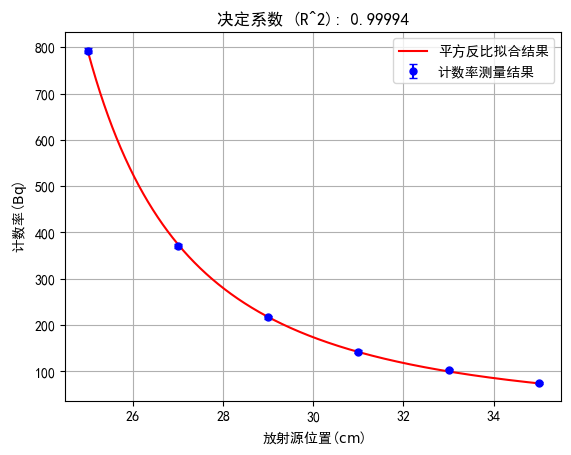

(array([15343.91519851,    20.59682025]),
 array([2.01232503e+02, 3.37383586e-02]),
 0.9999377573534415)

In [91]:
# 定义非线性模型
def my_model(r, a,r0):
    return a/(r-r0)**2

x_data = 50-df_dis['距离参数(cm)'].values  # 刻度差
y_data = df_dis['n'].values
y_error = df_dis['sigma_n'].values

# 使用curve_fit进行非线性拟合
params, covmatrix = curve_fit(my_model, x_data, y_data,sigma=y_error,p0=(15257,20.7))
# params, covmatrix = curve_fit(my_model, x_data, y_data)

# 提取拟合参数

std = np.sqrt(np.diag(covmatrix))

# 计算拟合值
y_fit = my_model(x_data,*params )

# 计算总平方和（Total Sum of Squares，TSS）
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)

# 计算残差平方和（Residual Sum of Squares，RSS）
rss = np.sum((y_data - y_fit)**2)

# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(i,params[i],std[i])
    print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

print(f"决定系数R^2为:{r_squared}")



# 可视化拟合过程
plt.figure()
plt.errorbar(x_data, y_data, yerr=y_error, fmt='bo', markersize=5, capsize=3, capthick=1, label='计数率测量结果')

max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)

#如果是np可接受的函数会方便很多，这里考虑一般情况
linspace_ydata=[]
for v in linspace_xdata:
    linspace_ydata.append(my_model(v,*params))

linspace_ydata=np.array(linspace_ydata)

plt.plot(linspace_xdata, linspace_ydata, label='平方反比拟合结果', color='r')
plt.xlabel(f'放射源位置($\mathrm{{cm}}$)')
plt.ylabel(f'计数率($\mathrm{{Bq}}$)')
plt.legend()
plt.grid()
plt.title(f"决定系数 (R^2): {r_squared:.{int(1-np.log10(1-r_squared))}f}")
plt.show()


params,std,r_squared

In [92]:
df_shi = pd.read_excel('Data2.xlsx',sheet_name='shield')
df_shi

,屏蔽参数,t_t,N_t,n_t,sigma_t,t_b,N_b,n_b,sigma_b,n,sigma
0,0.000,52,18421,354.250000,2.610077,30,3991,133.033333,2.105812,221.216667,3.353646
1,1.840,56,16983,303.267857,2.327122,34,4552,133.882353,1.984368,169.385504,3.058302
2,3.658,48,13029,271.437500,2.378013,32,4297,134.281250,2.048485,137.156250,3.138668
3,5.419,50,12459,249.180000,2.232398,34,4576,134.588235,1.989592,114.591765,2.990331
4,7.239,48,11173,232.770833,2.202134,35,4654,132.971429,1.949149,99.799405,2.940846
5,8.985,54,11695,216.574074,2.002656,41,5480,133.658537,1.805537,82.915537,2.696404
6,10.777,51,10381,203.549020,1.997788,40,5007,125.175000,1.769004,78.374020,2.668433


0 211.2359042931449 6.73119128727782
第0个参数的结果为:$( 2.11\pm0.07 )\times 10^2.0$
1 0.10387179392010171 0.006801968455866839
第1个参数的结果为:$( 1.04\pm0.07 )\times 10^-1.0$
决定系数R^2为:0.9811642589910208


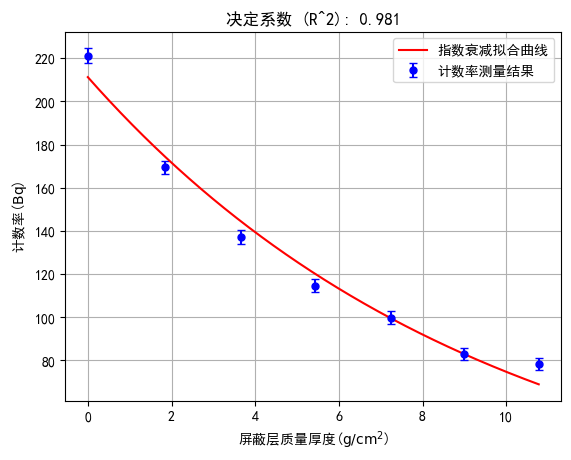

(array([2.11235904e+02, 1.03871794e-01]),
 array([6.73119129, 0.00680197]),
 0.9811642589910208)

In [93]:
# 定义非线性模型
def my_model(t, N0,mu):
    return N0*np.exp(-mu*t)

# 创建模拟数据
x_data = df_shi['屏蔽参数'].values
y_data = df_shi['n'].values
y_error = df_shi['sigma'].values


# 使用curve_fit进行非线性拟合
params, covmatrix = curve_fit(my_model, x_data, y_data,sigma=y_error,p0=(213,0.1))

# 提取拟合参数

std = np.sqrt(np.diag(covmatrix))

# 计算拟合值
y_fit = my_model(x_data,*params )

# 计算总平方和（Total Sum of Squares，TSS）
y_mean = np.mean(y_data)
tss = np.sum((y_data - y_mean)**2)

# 计算残差平方和（Residual Sum of Squares，RSS）
rss = np.sum((y_data - y_fit)**2)

# 计算决定系数 R^2
r_squared = 1 - (rss / tss)

# 结果报道
for i in range(params.shape[0]):
    print(i,params[i],std[i])
    print(f'第{i}个参数的结果为:{string_result(params[i],std[i],latex=True)}')

print(f"决定系数R^2为:{r_squared}")



# 可视化拟合过程
plt.figure()
plt.errorbar(x_data, y_data, yerr=y_error, fmt='bo', markersize=5, capsize=3, capthick=1, label='计数率测量结果')

max_value = np.max(x_data)
min_value = np.min(x_data)
linspace_xdata = np.linspace(min_value, max_value, 1000)

#如果是np可接受的函数会方便很多，这里考虑一般情况
linspace_ydata=[]
for v in linspace_xdata:
    linspace_ydata.append(my_model(v,*params))

linspace_ydata=np.array(linspace_ydata)

plt.plot(linspace_xdata, linspace_ydata, label='指数衰减拟合曲线', color='r')
plt.xlabel(f'屏蔽层质量厚度($\mathrm{{g/cm^2}}$)')
plt.ylabel(f'计数率($\mathrm{{Bq}}$)')
plt.legend()
plt.grid()
plt.title(f"决定系数 (R^2): {r_squared:.3f}")
plt.show()


params,std,r_squared

In [94]:
df = pd.read_excel('Data2.xlsx',sheet_name='time')
df

,序号,t_s,N_s,n_s,t_b,N_b,n_b,n
0,1,16,5700,356.250000,9,1176,130.666667,225.583333
1,2,32,11273,352.281250,18,2388,132.666667,219.614583
2,3,48,17104,356.333333,27,3596,133.185185,223.148148
3,4,64,22731,355.171875,36,4729,131.361111,223.810764
4,5,80,28176,352.200000,45,6070,134.888889,217.311111
